In [1]:
import rmgpy
from rmgpy.molecule.resonance import *
from rmgpy.molecule.molecule import Molecule
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase
import glpk

In [2]:
molecule = Molecule().fromSMILES('C1=CC=C2C(C=CC3C2=CC=C2C=CC=CC=32)=C1')

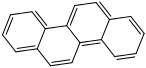

In [3]:
molecule

In [4]:
molecule.isAromatic()

False

In [5]:
SSSR = molecule.getAromaticSSSR()
SSSR

[[<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>],
 [<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>],
 [<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>],
 [<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>]]

In [22]:
atoms = set()
for ring in SSSR:
    atoms.update(ring)
atoms = list(atoms)

# Get list of bonds involving the ring atoms, ignoring bonds to hydrogen
bonds = set()
for atom in atoms:
    bonds.update([atom.bonds[key] for key in atom.bonds.keys() if key.isNonHydrogen()])
bonds = list(bonds)

# Connectivity matrix which indicates which rings and bonds each atom is in
# Part of equality constraint Ax=b
a = []
for atom in atoms:
    inRing = [1 if atom in ring else 0 for ring in SSSR]
    inBond = [1 if atom in [bond.atom1, bond.atom2] else 0 for bond in bonds]
    a += (inRing + inBond)

z = [1] * len(SSSR) + [0] * len(bonds)

In [41]:
lp = glpk.LPX()
lp.obj.maximize = True
lp.rows.add(len(atoms))
for r in lp.rows:
    r.bounds = (1, 1)

lp.cols.add(len(SSSR) + len(bonds))
for c in lp.cols:
    c.bounds = (0, 1)
    c.kind = bool

lp.obj[:] = z

lp.matrix = a

lp.intopt()

print lp.status

opt


In [29]:
lp.nbin

25

In [33]:
lp.obj.value

2.0

In [38]:
[c.value for c in lp.cols]

[1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [40]:
lp.kind

int